In [ ]:
"""
-- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class has been used for image classification project
-- Convolutional neural network (CNN) and data agumentaion has been tested for image classification
-- Transfer learning with ResNet50 model has been used for image classification
-- Transfer learning with ResNet50 model has been used for image classification
"""

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.applications.resnet50 import ResNet50

2024-09-01 16:49:45.675966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(xtrain,ytrain),(xtest,ytest) = keras.datasets.cifar10.load_data()

In [25]:
xtrain=xtrain/255
xtest=xtest/255

# Use Convolutional neural network (CNN) and data agumentaion for image classification

In [8]:
data_agumentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    
])

In [9]:
model=keras.Sequential([
    data_agumentation,    
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)), 
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),
  
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [10]:
model.fit(xtrain,ytrain, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 25ms/step - loss: 2.1509 - accuracy: 0.3020
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5620 - accuracy: 0.4354
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4662 - accuracy: 0.4744
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4036 - accuracy: 0.4984
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.3477 - accuracy: 0.5239
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.3107 - accuracy: 0.5365
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2738 - accuracy: 0.5506
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2520 - accuracy: 0.5621
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2248 - accuracy: 0.5696
Epoch 10/10
1563/1563 [==============================] - 41s 27m

In [11]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 2s 6ms/step - loss: 1.1514 - accuracy: 0.6071


[1.15139901638031, 0.6071000099182129]

313/313 [==============================] - 2s 5ms/step


<Axes: >

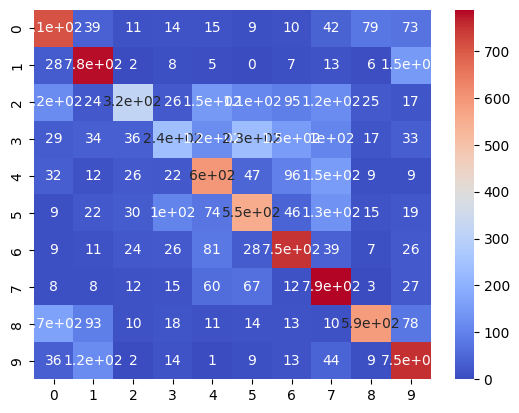

In [12]:
ypred=model.predict(xtest)
ypred=[np.argmax(i) for i in ypred]
cm=tf.math.confusion_matrix(ytest,ypred)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [14]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1000
           1       0.68      0.78      0.73      1000
           2       0.68      0.32      0.43      1000
           3       0.49      0.24      0.32      1000
           4       0.54      0.59      0.56      1000
           5       0.52      0.55      0.53      1000
           6       0.63      0.75      0.68      1000
           7       0.55      0.79      0.65      1000
           8       0.78      0.59      0.67      1000
           9       0.64      0.75      0.69      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.59     10000
weighted avg       0.61      0.61      0.59     10000



# Transfer Learning of image calssification with ResNet50 model

In [41]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

def ResNet_model():
    inputs = tf.keras.layers.Input(shape=(32,32,3))
    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)
    x=base_model(resize)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    model = tf.keras.Model(inputs=inputs, outputs = x)
     
    model.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
    return model

In [42]:
model=ResNet_model()
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_8 (UpSamplin  (None, 224, 224, 3)       0         
 g2D)                                                            
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_6  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              2098

In [43]:
model.fit(xtrain,ytrain, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 3252s 2s/step - loss: 0.9228 - accuracy: 0.6730
Epoch 2/3
1563/1563 [==============================] - 3160s 2s/step - loss: 0.6854 - accuracy: 0.7570
Epoch 3/3
1563/1563 [==============================] - 3283s 2s/step - loss: 0.6067 - accuracy: 0.7862


In [44]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 657s 2s/step - loss: 0.7480 - accuracy: 0.7390


[0.7480339407920837, 0.7390000224113464]

In [45]:
ypred=model.predict(xtest)
ypred=[np.argmax(i) for i in ypred]
cm=tf.math.confusion_matrix(ytest,ypred)
sns.heatmap(cm, annot=True, cmap="coolwarm")

144/313 [============>.................] - ETA: 6:23

In [ ]:
print(classification_report(ytest,ypred))

## Transfer Learning of image calssification with MobileNet model

In [ ]:

def MobileNet_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):

    input_shape = image_shape + (3,)
    
    ### START CODE HERE
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')
    
    # freeze the base model by making it non trainable
    base_model.trainable = False 

    # create the input layer (Same as the imageNetv2 input size)
    
    
    # apply data augmentation to the inputs
    x = data_augmentation(inputs)
    
    # data preprocessing using the same weights the model was trained on
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x) 
    
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False) 
    
    # add the new Binary classification layers
    # use global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x) 
    # include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.2)(x)
        
    # use a prediction layer with one neuron (as a binary classifier only needs one)
    outputs = tfl.Dense(1)(x)
    
    ### END CODE HERE
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

# Transfer Learning with MobileNetV2

In [ ]:
def MobileNet_model(image_shape=IMG_SIZE):
    inputs = tf.keras.Input(shape=input_shape) 
    x = data_augmentation(inputs)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x) 
    x= tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')(x)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Dropout(0.2)(x)
    outputs = tfl.Dense(1)(x)
    model = tf.keras.Model(inputs, outputs)
    return model